# Collision Severity Prediction

This notebook is extra CRISPy used for the Capstone Project for IBM DS Pro Certificate.  It covers -

* Business Understanding: Excluded from here, included in report
* Data Understanding:  In this phase, you need to collect or extract the dataset from various sources such as csv file or SQL database. Then, you need to determine the attributes (columns) that you will use to train your machine learning model. Also, you will assess the condition of chosen attributes by looking for trends, certain patterns, skewed information, correlations, and so on. 
* Data Preparation:  The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset. 
* Modeling:  In this phase, various algorithms and methods can be selected and applied to build the model including supervised machine learning techniques. You can select SVM, XGBoost, decision tree, or any other techniques. You can select a single or multiple machine learning models for the same data mining problem. At this phase, stepping back to the data preparation phase is often required. 
* Evaluation:  Before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the applications' objectives are achieved. Certain metrics can be used for the model evaluation such as accuracy, recall, F1-score, precision, and others. 
* Deployment: Excluded, no deployment necessary


For details on all attributes visit the following link -
https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

Original Data Set - https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.310%2C47.452%2C-121.352%2C47.776

Coursera Subset - https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

ESRI Metadata - https://www.arcgis.com/sharing/rest/content/items/5b5c745e0f1f48e7a53acec63a0022ab/info/metadata/metadata.xml?format=default&output=html

This project uses accident data from SDOT and is referred to as collisions.  The data is <a href="https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.310%2C47.452%2C-121.352%2C47.776">hosted</a> by SDOT GIS Division and curated by the SDOT Traffic Division where collisions are collected from Seattle Police Department after a collision is reported.  Instead of using the full data set this project uses a <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv">subset</a> of the data provided by Coursera.
<br><br>
General characteristics of the subset -
- Format: CSV
- Timeframe: January 2004 to May 2020
- Columns: 38, 37 are unique
- Rows:  194,673
- Bounding Coordinates
-- West Bounding Coordinate: -122.4754
-- East Bounding Coordinate: -122.2008
-- North Bounding Coordinate: 47.7582
-- South Bounding Coordinate: 47.4814

*Data-Collisions.csv* attributes with data type, detail and examples as defined in Collision_OD PDF:

- Severity
    - **SEVERITYCODE** - Text,100 - code that corresponds to the severity, e.g., 3—fatality, 2b—serious injury, 2—injury, 1—property damage, 0—unknown
    - **SEVERITYDESC** - Text,300 - Detailed description of the severity, e.g., Property Damage Only Collision, Injury Collision
- Location, Time
    - **INCDATE** - Date - date of the incident, ex: 2013/03/27 00:00:00+00
    - **INCDTTM** - Text,30 - date and time of the incident, ex: 3/27/2013  2:54:00 PM 
    - **X** - float - longitude of the collision
    - **Y** - float - latitude of the collision
    - **LOCATION** - Text,255 - description of the general location of the collision, e.g. 5TH AVE NE AND NE 103RD ST
    - **ADDRTYPE** - Text,12 -  collision address type, e.g, alley, block, intersection
    - **JUNCTIONTYPE** - Text,300 - category of junction where the collision occurred. e.g., At Intersection (intersection related)
    - **INTKEY** - Double - key corresponding to the intersection associated with a collision 
    - **CROSSWALKKEY** - Long - key for the crosswalk at which the collision occurred 
- Environment Conditions
    - **WEATHER** - Text,300 - weather condition, e.g., Clear, Overcast, Raining, Snowing 
    - **ROADCOND** - Text,300 - road condition, e.g., Wet, Dry
    - **LIGHTCOND** - Text,300 - light condition, e.g., Daylight, Dark, Dark - Street Lights On
- Counts
    - **VEHCOUNT** - Double - number of vehicles involved in the collision
    - **PERSONCOUNT** - Double - total number of people involved in the collision 
    - **PEDCOUNT** - Double - number of pedestrians involved in the collision 
    - **PEDCYLCOUNT** - Double - number of bicycles involved in the collision
- Human Factors
    - **INATTENTIONIND** - Text,1 - whether or not collision was due to inattention (Y/N) 
    - **UNDERINFL** - Text,1 - whether or not a driver involved was under the influence of drugs or alcohol 
- Collision Descriptors
    - **COLLISIONTYPE** - Text,300 - collision type, e.g., Angle, Sideswipe, Parked Car
    - **SPEEDING** - Text,1 - whether or not speeding was a factor in the collision (Y/N) 
    - **SEGLANEKEY** - Long - key for the lane segment in which the collision occurred 
    - **HITPARKEDCAR** - Text,1 - whether or not the collision involved hitting a parked car (Y/N) 
    - **PEDROWNOTGRNT** - Text,1 - whether or not the pedestrian right of way was not granted (Y/N) 
    - **SDOTCOLNUM** - Text, 10 - number given to the collision by SDOT 
    - **SDOT_COLCODE** - Text,10 - code assigned to the collision by SDOT
    - **SDOT_COLDESC** - Text,300 - description corresponding to the collision code 
    - **ST_COLCODE** - Text,10 - code provided by the state that describes the collision 
    - **ST_COLDESC** - Text,300 - description that corresponds to the state’s coding designation 
- Miscellaneous
    - **OBJECTID** - Double - ESRI unique identifier 
    - **INCKEY** - Long - A unique key for the incident 
    - **COLDETKEY** - Long - Secondary key for the incident 
    - **EXCEPTRSNCODE** - Text,10 - undefined 
    - **EXCEPTRSNDESC** - Text,300 - A unique key for the incident 
    - **REPORTNO** - Long - undefined 
    - **STATUS** - Text - undefined 
<br>

In [1]:
!conda install -c conda-forge xgboost -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    joblib-0.17.0              |             py_0         204 KB  conda-forge
    libxgboost-1.2.0           |       he1b5a44_0         3.1 MB  conda-forge
    py-xgboost-1.2.0           |   py36h9f0ad1d_0         1.7 MB  conda-forge
    scikit-learn-0.23.2        |   py36hfb379a7_0         6.8 MB  conda-forge
    scipy-1.5.2                |   py36h3a855aa_0        18.6 MB  conda-forge
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          15 KB  conda-forge
    xgboost-1.2.0              |   py36h831f99a_0          11 KB  conda-forge
    ------------------------------------------------------------
                   

In [2]:
!conda install -c conda-forge imbalanced-learn --y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1



imbalanced-learn-0.7 | 97 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [4]:
import pandas as pd
import types
import itertools
import numpy as np
from datetime import timedelta

from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import pydotplus
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline

# Data Understanding

Examine the attributes in the context of collision severity.  If it doesn't help us with predicting severity then it's not worth including the attribute in our feature set.

In [5]:
# Read data file from Coursera, not SDOT.  Low memory suppresses warning when loading file, does nothing else
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv",\
                low_memory = False)
print('File downloaded')

File downloaded


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [7]:
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [8]:
rs = np.random.RandomState(0)
corr = df.corr()
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.00,0.01,0.02,0.02,0.02,0.02,0.01,1.00,0.13,0.25,0.21,-0.05,0.19,0.00,0.10,0.18
X,0.01,1.00,-0.16,0.01,0.01,0.01,0.12,0.01,0.01,0.01,-0.00,-0.01,0.01,-0.00,-0.00,0.01
Y,0.02,-0.16,1.00,-0.02,-0.03,-0.03,-0.11,0.02,-0.01,0.01,0.03,0.02,-0.02,-0.01,0.00,0.01
OBJECTID,0.02,0.01,-0.02,1.00,0.95,0.95,0.05,0.02,-0.06,0.02,0.03,-0.09,-0.04,0.97,0.03,0.06
INCKEY,0.02,0.01,-0.03,0.95,1.00,1.00,0.05,0.02,-0.06,0.02,0.03,-0.11,-0.03,0.99,0.02,0.05
COLDETKEY,0.02,0.01,-0.03,0.95,1.00,1.00,0.05,0.02,-0.06,0.02,0.03,-0.11,-0.03,0.99,0.02,0.05
INTKEY,0.01,0.12,-0.11,0.05,0.05,0.05,1.00,0.01,0.00,-0.00,0.00,-0.01,0.01,0.03,-0.01,0.02
SEVERITYCODE.1,1.00,0.01,0.02,0.02,0.02,0.02,0.01,1.00,0.13,0.25,0.21,-0.05,0.19,0.00,0.10,0.18
PERSONCOUNT,0.13,0.01,-0.01,-0.06,-0.06,-0.06,0.00,0.13,1.00,-0.02,-0.04,0.38,-0.13,0.01,-0.02,-0.03
PEDCOUNT,0.25,0.01,0.01,0.02,0.02,0.02,-0.00,0.25,-0.02,1.00,-0.02,-0.26,0.26,0.02,0.00,0.57


In [9]:
# Dropping the columns that are keys and have minimum correlation to severity, leave in lat/long for now
df.drop(columns=['OBJECTID','INCKEY','COLDETKEY','INTKEY','SEVERITYCODE.1'],inplace=True)

## Collision Severity

In [13]:
# Add Year attribute
df_explore = df[['SEVERITYCODE', 'SEVERITYDESC', 'INCDTTM']].copy()
df_explore['INCDTTM'] = pd.to_datetime(df_explore['INCDTTM'])
df_explore['YEAR'] = df_explore['INCDTTM'].dt.year

In [14]:
print(df_explore.shape)
print(df['SEVERITYCODE'].isna().sum())
df_explore.groupby(['SEVERITYDESC'])['SEVERITYCODE'].value_counts()

(194673, 4)
0


SEVERITYDESC                    SEVERITYCODE
Injury Collision                2                58188
Property Damage Only Collision  1               136485
Name: SEVERITYCODE, dtype: int64

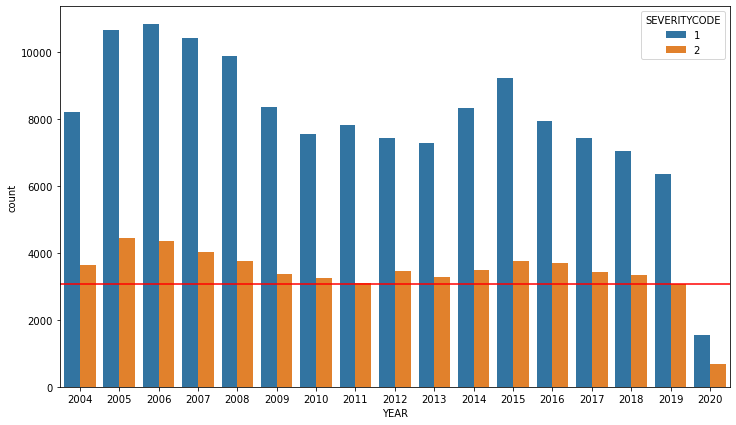

In [15]:
figsize=(12,7)
fig, ax = plt.subplots(figsize=figsize)
g = sns.countplot(x="YEAR", hue="SEVERITYCODE", data=df_explore, ax=ax)
g.axhline(df_explore[(df_explore.YEAR == 2019) & (df_explore.SEVERITYCODE == 2)]['YEAR'].count(), color='red')

## Location - Latitude, Longitude

Looking at the scatterplot there's accident's everywhere and while there are hotzones it's not enough to sway severity.  The report shows some sidebar work of the collision data by neighborbood and while interesting does not show a strong relationship to Injury severity.  For now do nothing with the coordinates but it is definitely something to consider in the future.  It would be possible to assign these to regions based on neighborhoods to find hotzones.  For now attempt to predict severity without it, can revisit later if time permits.

In [16]:
print(df['X'].value_counts())
print(df['X'].isna().sum())

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64
5334


In [17]:
df_explore = df[['SEVERITYCODE', 'X', 'Y']].copy()
df_explore['XY'] = df_explore['X'].astype(str) + "-" + df_explore['Y'].astype(str)
df_explore['XY'].value_counts()

nan-nan                                   5334
-122.3326533-47.7086545                    265
-122.34489609999999-47.717173100000004     254
-122.32807859999998-47.60416123            252
-122.34499679999999-47.72503555            239
                                          ... 
-122.299508-47.60901293                      1
-122.3024929-47.55781677                     1
-122.28807590000001-47.62438309              1
-122.27667050000001-47.51903241              1
-122.3793163-47.53126905                     1
Name: XY, Length: 23885, dtype: int64

In [18]:
df_explore.corr
rs = np.random.RandomState(0)
corr = df_explore.corr()
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,SEVERITYCODE,X,Y
SEVERITYCODE,1.00,0.01,0.02
X,0.01,1.00,-0.16
Y,0.02,-0.16,1.00


<AxesSubplot:xlabel='X', ylabel='Y'>

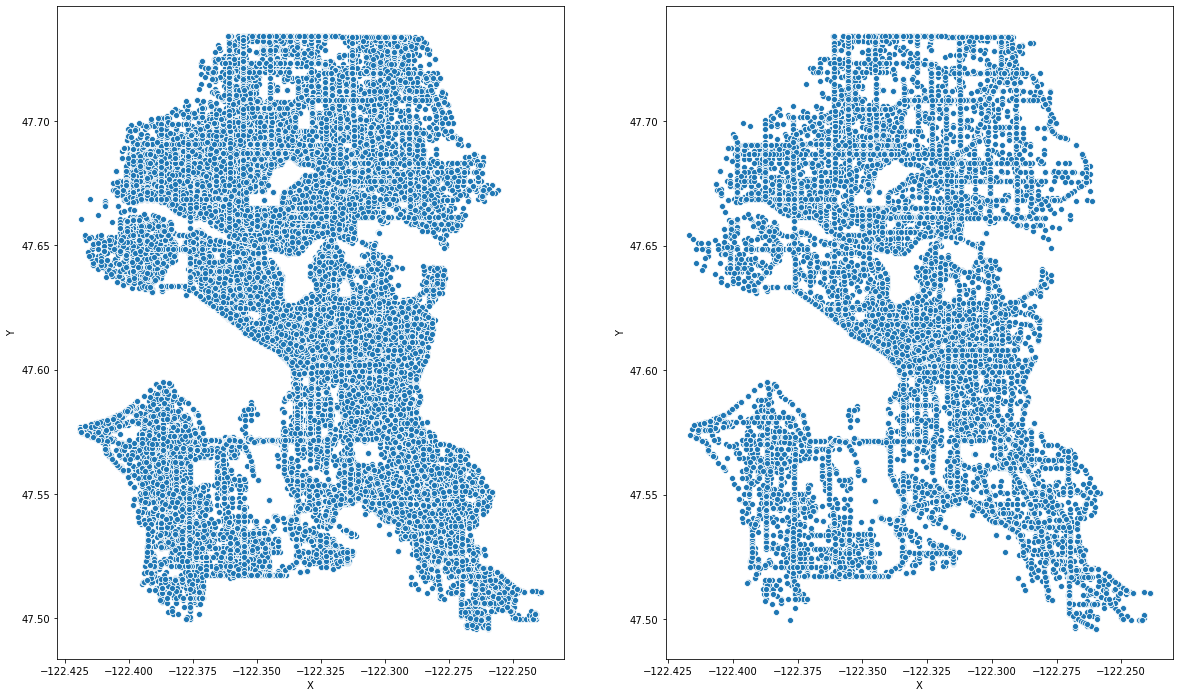

In [19]:
fig, ax = plt.subplots(1,2, figsize = (20, 12))
ax1, ax2 = ax.flatten()
sns.scatterplot(x="X", y="Y", data=df_explore, ax=ax1)
sns.scatterplot(x="X", y="Y", data=df_explore[(df_explore.SEVERITYCODE == 2)], ax=ax2)

## Location - Street

There is a lot of information here but there is collision is already geocoded so this seems like it's not worth it.  It seems possible to parse this and do some analysis to help with severity but that is out of scope here.  It would be interesting to use BERT here.

In [20]:
df['LOCATION'].head()

0                     5TH AVE NE AND NE 103RD ST
1     AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N
2    4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST
3       2ND AVE BETWEEN MARION ST AND MADISON ST
4                SWIFT AVE S AND SWIFT AV OFF RP
Name: LOCATION, dtype: object

## Location - CROSSWALKKEY

Not sure what this is, but a guess is that there is a dictionary of crosswalks for all of Seattle and this would indicate a particular one.  It would be interesting to explore this further because this could indicate a hotzone.

In [21]:
print(df['CROSSWALKKEY'].unique())
print(df['CROSSWALKKEY'].value_counts())

[     0 520838 521466 ... 523792 650595 523322]
0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64


## Location - ADDRTYPE, JUNCTIONTYPE

For junction type keep At Intersection (intersection related), Mid-Block (not related to intersection), Driveway Junction, and Mid-Block (but intersection related).  For address type only alley doen't have a lot of use.

In [22]:
df_explore = df[['SEVERITYCODE', 'ADDRTYPE', 'JUNCTIONTYPE']].copy()

In [23]:
df_explore_one_hot = pd.get_dummies(df_explore, columns=['ADDRTYPE','JUNCTIONTYPE'])
rs = np.random.RandomState(0)
corr = df_explore_one_hot.corr()
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,SEVERITYCODE,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown
SEVERITYCODE,1.00,-0.03,-0.18,0.20,-0.00,0.20,0.00,0.02,-0.17,0.00,-0.00
ADDRTYPE_Alley,-0.03,1.00,-0.09,-0.04,-0.01,-0.04,0.01,-0.02,-0.03,-0.00,-0.00
ADDRTYPE_Block,-0.18,-0.09,1.00,-0.97,-0.14,-0.94,0.17,0.27,0.67,0.01,-0.00
ADDRTYPE_Intersection,0.20,-0.04,-0.97,1.00,0.15,0.97,-0.17,-0.26,-0.66,-0.01,-0.00
JUNCTIONTYPE_At Intersection (but not related to intersection),-0.00,-0.01,-0.14,0.15,1.00,-0.07,-0.03,-0.04,-0.10,-0.00,-0.00
JUNCTIONTYPE_At Intersection (intersection related),0.20,-0.04,-0.94,0.97,-0.07,1.00,-0.17,-0.25,-0.64,-0.02,-0.00
JUNCTIONTYPE_Driveway Junction,0.00,0.01,0.17,-0.17,-0.03,-0.17,1.00,-0.09,-0.22,-0.01,-0.00
JUNCTIONTYPE_Mid-Block (but intersection related),0.02,-0.02,0.27,-0.26,-0.04,-0.25,-0.09,1.00,-0.34,-0.01,-0.00
JUNCTIONTYPE_Mid-Block (not related to intersection),-0.17,-0.03,0.67,-0.66,-0.10,-0.64,-0.22,-0.34,1.00,-0.03,-0.01
JUNCTIONTYPE_Ramp Junction,0.00,-0.00,0.01,-0.01,-0.00,-0.02,-0.01,-0.01,-0.03,1.00,-0.00


In [24]:
print(df_explore['ADDRTYPE'].unique())
print(df_explore['ADDRTYPE'].value_counts())

['Intersection' 'Block' 'Alley' nan]
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64


In [25]:
df_explore.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts()

ADDRTYPE      SEVERITYCODE
Alley         1                 669
              2                  82
Block         1               96830
              2               30096
Intersection  1               37251
              2               27819
Name: SEVERITYCODE, dtype: int64

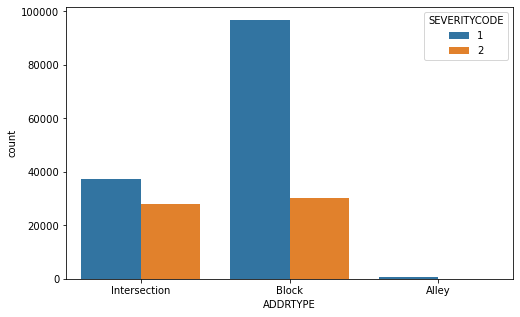

In [26]:
figsize=(8,5)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYCODE", data=df_explore)

In [27]:
print(df_explore['JUNCTIONTYPE'].unique())
print(df_explore['JUNCTIONTYPE'].value_counts())

['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64


In [28]:
df_explore.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts()

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1                1475
                                                   2                 623
At Intersection (intersection related)             1               35636
                                                   2               27174
Driveway Junction                                  1                7437
                                                   2                3234
Mid-Block (but intersection related)               1               15493
                                                   2                7297
Mid-Block (not related to intersection)            1               70396
                                                   2               19404
Ramp Junction                                      1                 112
                                                   2                  54
Unknown                                            1        

<AxesSubplot:xlabel='JUNCTIONTYPE', ylabel='count'>

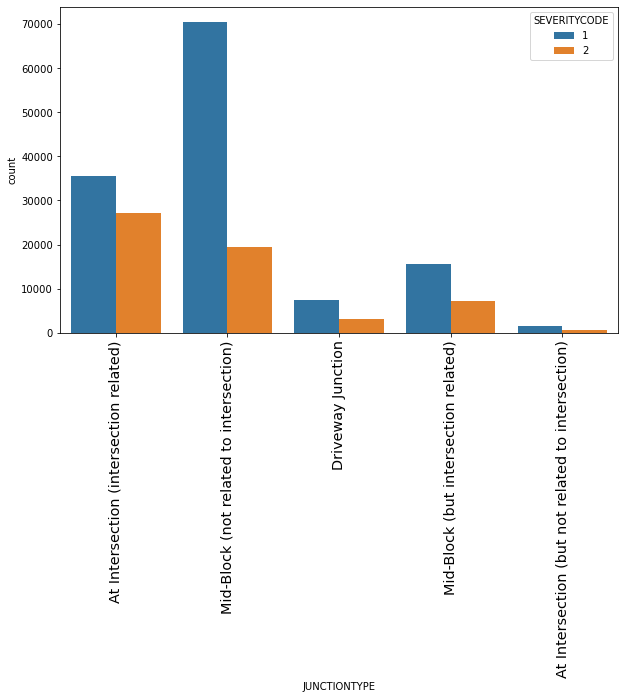

In [29]:
figsize=(10,6)
fig, ax = plt.subplots(figsize=figsize)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
)
sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYCODE", data=df_explore[~df_explore.JUNCTIONTYPE.isin(['Ramp Junction', 'Unknown'])], ax=ax)

## Collision Date

INCDATE is same as INCDTTM without the time.  So focus on INCDTTM which is in 12h time with merdian.

In [30]:
df[{'INCDATE','INCDTTM'}].head()

,INCDTTM,INCDATE
0,3/27/2013 2:54:00 PM,2013/03/27 00:00:00+00
1,12/20/2006 6:55:00 PM,2006/12/20 00:00:00+00
2,11/18/2004 10:20:00 AM,2004/11/18 00:00:00+00
3,3/29/2013 9:26:00 AM,2013/03/29 00:00:00+00
4,1/28/2004 8:04:00 AM,2004/01/28 00:00:00+00


In [31]:
df_explore = df[['SEVERITYCODE', 'INCDTTM']].copy()
df_explore['INCDTTM'] = pd.to_datetime(df_explore['INCDTTM'])
df_explore.dropna(inplace=True)
df_explore.head()

,SEVERITYCODE,INCDTTM
0,2,2013-03-27 14:54:00
1,1,2006-12-20 18:55:00
2,1,2004-11-18 10:20:00
3,1,2013-03-29 09:26:00
4,2,2004-01-28 08:04:00


In [32]:
def peak_offpeak(inputDate):
    hour = inputDate.hour
    try:
        return 1 if (hour>=8 and hour<=18) else 0
    except:
        return 0

Analysis on the date of the collision.  Check the month, weekday, hour, week in the year.  Check peak or offpeak that would be similar to the workday hours, this might help with generalization but with predicting severity inquestionable unless something jumps out.

In [33]:
df_explore['MONTH'] = df_explore['INCDTTM'].dt.month
df_explore['WEEKDAY'] = df_explore['INCDTTM'].dt.weekday
df_explore['HOUR'] = df_explore['INCDTTM'].dt.strftime('%H').astype(int)
df_explore['PEAKOROFFPEAK'] = df_explore['INCDTTM'].apply(lambda x: peak_offpeak(x))
df_explore['YEARWEEK'] = df_explore["INCDTTM"].dt.week
df_explore.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,SEVERITYCODE,INCDTTM,MONTH,WEEKDAY,HOUR,PEAKOROFFPEAK,YEARWEEK
0,2,2013-03-27 14:54:00,3,2,14,1,13
1,1,2006-12-20 18:55:00,12,2,18,1,51
2,1,2004-11-18 10:20:00,11,3,10,1,47
3,1,2013-03-29 09:26:00,3,4,9,1,13
4,2,2004-01-28 08:04:00,1,2,8,1,5


In [34]:
corr = df_explore.corr()
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,SEVERITYCODE,MONTH,WEEKDAY,HOUR,PEAKOROFFPEAK,YEARWEEK
SEVERITYCODE,1.00,0.00,-0.02,0.03,0.04,0.01
MONTH,0.00,1.00,-0.00,0.01,0.00,0.98
WEEKDAY,-0.02,-0.00,1.00,-0.02,-0.08,-0.00
HOUR,0.03,0.01,-0.02,1.00,0.36,0.03
PEAKOROFFPEAK,0.04,0.00,-0.08,0.36,1.00,0.02
YEARWEEK,0.01,0.98,-0.00,0.03,0.02,1.00


[Text(0.5, 0, 'Collisions'), Text(0, 0.5, 'Peak')]

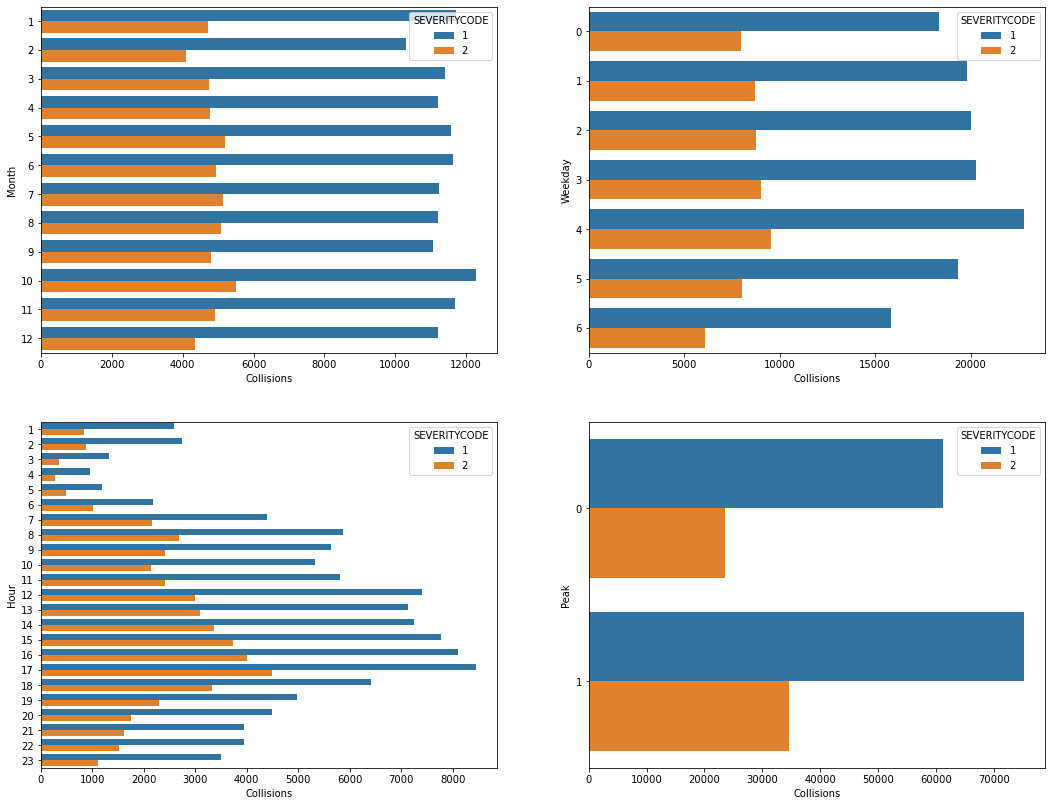

In [35]:
fig, ax = plt.subplots(2,2, figsize = (18, 14))
ax1, ax2, ax3, ax4 = ax.flatten()

sns.countplot(y="MONTH", hue="SEVERITYCODE", data=df_explore, ax=ax1)
ax1.set(xlabel='Collisions', ylabel="Month")

sns.countplot(y="WEEKDAY", hue="SEVERITYCODE", data=df_explore, ax=ax2)
ax2.set(xlabel='Collisions', ylabel="Weekday")

sns.countplot(y="HOUR", hue="SEVERITYCODE", data=df_explore[(df_explore.HOUR != 0)], ax=ax3)
ax3.set(xlabel='Collisions', ylabel="Hour")

sns.countplot(y="PEAKOROFFPEAK", hue="SEVERITYCODE", data=df_explore, ax=ax4)
ax4.set(xlabel='Collisions', ylabel="Peak")

[Text(0.5, 0, 'Collisions'), Text(0, 0.5, 'Week')]

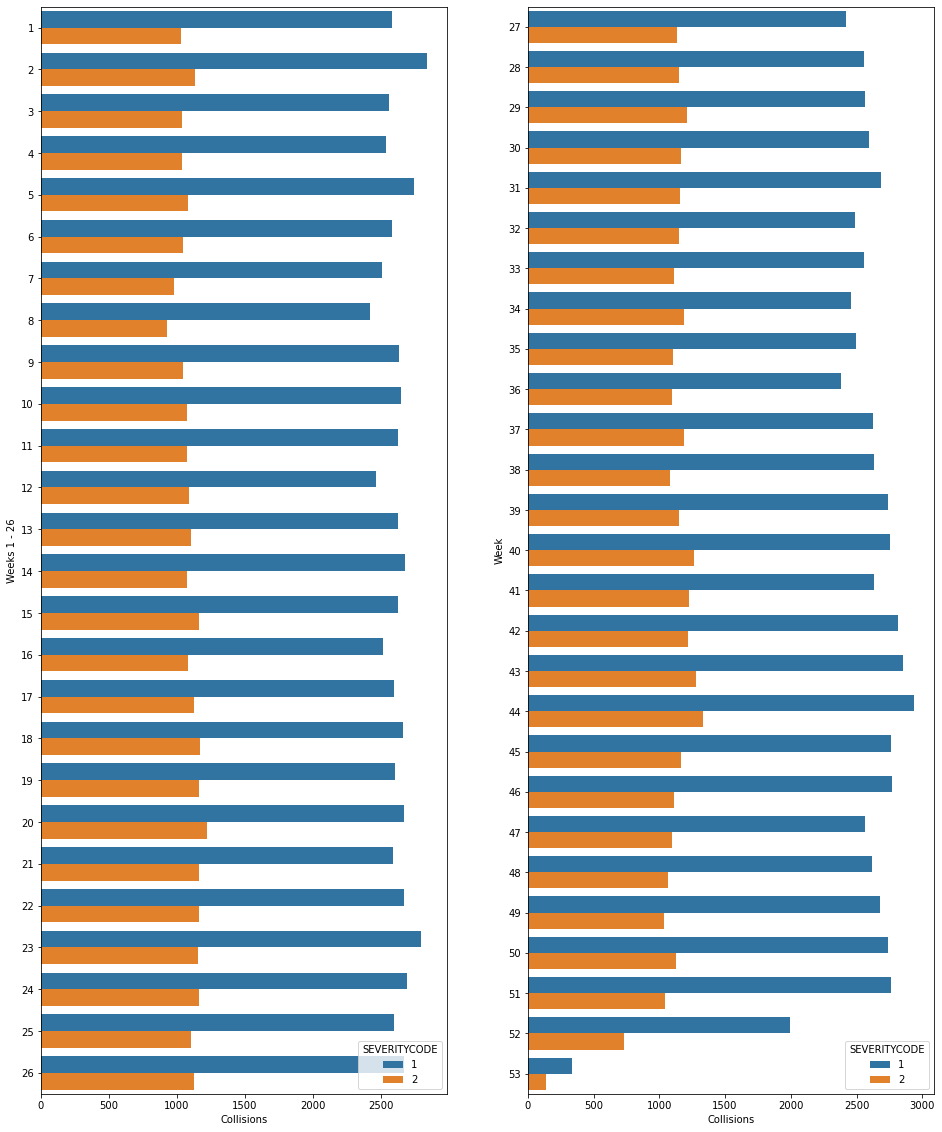

In [36]:
# Any based on the week?
fig, (ax5, ax6) = plt.subplots(1, 2, figsize = (16, 20))
sns.countplot(y="YEARWEEK", hue="SEVERITYCODE", data=df_explore[(df_explore.YEARWEEK <= 26)], ax=ax5)
ax5.set(xlabel='Collisions', ylabel="Weeks 1 - 26")
sns.countplot(y="YEARWEEK", hue="SEVERITYCODE", data=df_explore[(df_explore.YEARWEEK > 26)], ax=ax6)
ax6.set(xlabel='Collisions', ylabel="Week")

## Environmental Conditions - Weather, Road, Light

In [37]:
df_explore = df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].copy()

In [38]:
df_explore['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [39]:
df_explore['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [40]:
df_explore['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='WEATHER'>

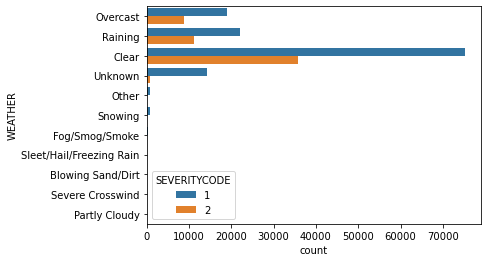

In [41]:
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df_explore)

For weather we keep overcast, raining, clear and unknown.  Everything else is not relavent.

<AxesSubplot:xlabel='count', ylabel='ROADCOND'>

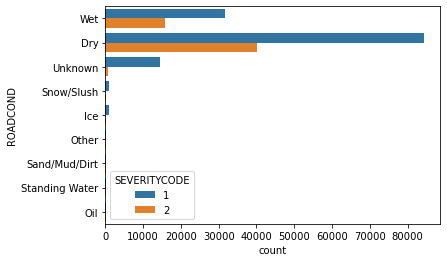

In [42]:
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df_explore)

For road condition keep wet, dry and unknown.

<AxesSubplot:xlabel='count', ylabel='LIGHTCOND'>

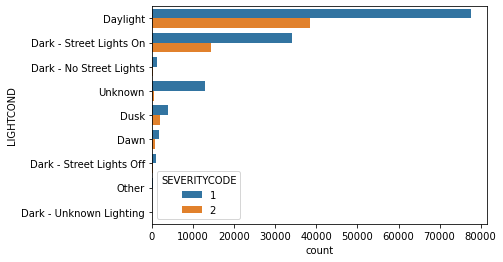

In [43]:
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df_explore)

For light condition keep daylight, dark with street lights on, dusk and unknown.

[Text(0.5, 0, 'Collisions'), Text(0, 0.5, 'Light Conditions')]

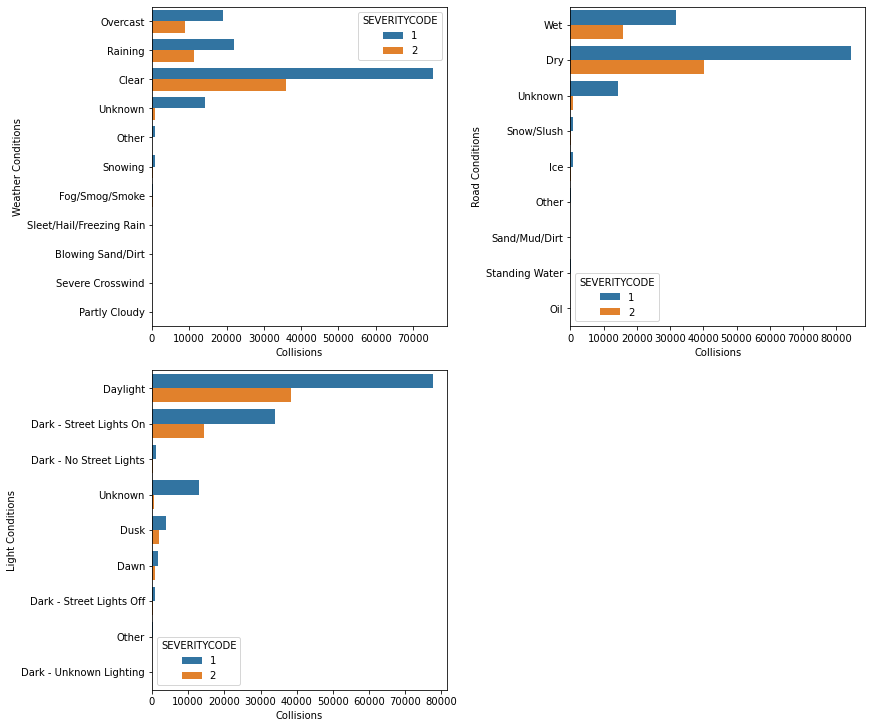

In [44]:
fig, ax = plt.subplots(2,2, figsize = (12, 10), constrained_layout=True)
ax1, ax2, ax3, ax4 = ax.flatten()
fig.delaxes(ax[1,1])

sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df_explore, ax=ax1)
ax1.set(xlabel='Collisions', ylabel="Weather Conditions")

sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df_explore, ax=ax2)
ax2.set(xlabel='Collisions', ylabel="Road Conditions")

sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df_explore, ax=ax3)
ax3.set(xlabel='Collisions', ylabel="Light Conditions")

## Counts - VEHCOUNT, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT

In [45]:
df_explore = df[['SEVERITYCODE','VEHCOUNT','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT']].copy()

In [46]:
df_explore['VEHCOUNT'].unique()

array([ 2,  3,  1,  0,  4,  7,  5,  6,  8, 11,  9, 10, 12])

In [47]:
df_explore['PERSONCOUNT'].unique()

array([ 2,  4,  3,  0,  1,  5,  6, 16,  8,  7, 11,  9, 12, 17, 26, 22, 10,
       37, 13, 36, 28, 14, 53, 19, 30, 29, 23, 44, 15, 32, 21, 41, 27, 20,
       35, 43, 81, 18, 25, 48, 24, 34, 57, 39, 47, 54, 31])

In [48]:
df_explore['PEDCOUNT'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [49]:
df_explore['PEDCYLCOUNT'].unique()

array([0, 1, 2])

In [50]:
corr = df_explore.corr()
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,SEVERITYCODE,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT
SEVERITYCODE,1.00,-0.05,0.13,0.25,0.21
VEHCOUNT,-0.05,1.00,0.38,-0.26,-0.25
PERSONCOUNT,0.13,0.38,1.00,-0.02,-0.04
PEDCOUNT,0.25,-0.26,-0.02,1.00,-0.02
PEDCYLCOUNT,0.21,-0.25,-0.04,-0.02,1.00


[Text(0.5, 0, 'Collisions'), Text(0, 0.5, 'Cyclist Count')]

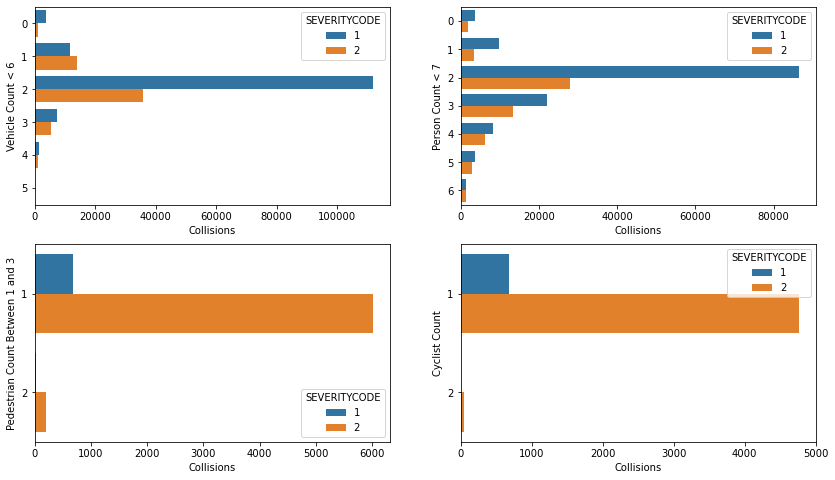

In [53]:
# Chart the counts. Apply filtering to the dataframe to tighten things up
fig, ax = plt.subplots(2,2, figsize = (14, 8))
ax1, ax2, ax3, ax4 = ax.flatten()

sns.countplot(y="VEHCOUNT", hue="SEVERITYCODE", data=df_explore[(df_explore.VEHCOUNT < 6)] , ax=ax1)
ax1.set(xlabel='Collisions', ylabel='Vehicle Count < 6')

sns.countplot(y="PERSONCOUNT", hue="SEVERITYCODE", data=df_explore[(df_explore.PERSONCOUNT < 7)], ax=ax2)
ax2.set(xlabel='Collisions', ylabel='Person Count < 7')

sns.countplot(y="PEDCOUNT", hue="SEVERITYCODE", data=df_explore[(df_explore.PEDCOUNT > 0) & (df_explore.PEDCOUNT < 3)], ax=ax3)
ax3.set(xlabel='Collisions', ylabel="Pedestrian Count Between 1 and 3")

sns.countplot(y="PEDCYLCOUNT", hue="SEVERITYCODE", data=df_explore[(df_explore.PEDCYLCOUNT > 0)], ax=ax4)
ax4.set(xlabel='Collisions', ylabel="Cyclist Count")

Person distribution is way off.  Side bar - there was a huge bus accident which had the 81 people involved, that was a single crash.  In any case this need to be adjusted for modeling.  Consider categorizing these resampling.  Same with vehicle count but this is not as bad.  While walkers and bike riders are almost certain to have an injury involved there are a minimum number of these so not a good candidate, try it out though.  

## Human Factors - INATTENTIONIND, UNDERINFL

There is a lot of distracted drivers causing accidents.  There is some correlation with both so these are candidates.

In [54]:
df_explore = df[['SEVERITYCODE','INATTENTIONIND','UNDERINFL']].copy()

In [55]:
df_explore['INATTENTIONIND'].unique()

array([nan, 'Y'], dtype=object)

In [56]:
df_explore['UNDERINFL'].unique()

array(['N', '0', nan, '1', 'Y'], dtype=object)

In [57]:
df_explore[['UNDERINFL','INATTENTIONIND']] = df_explore[['UNDERINFL','INATTENTIONIND']].replace(['Y','1', 1.0], 1)
df_explore['UNDERINFL'] = df_explore['UNDERINFL'].replace(['N','0', 0.0], 0)
df_explore['INATTENTIONIND'] = df_explore['INATTENTIONIND'].replace(np.nan, 0)
df_explore['UNDERINFL'] = df_explore['UNDERINFL'].replace(np.nan, 0)

In [58]:
df_explore['INATTENTIONIND'].value_counts()

0.0    164868
1.0     29805
Name: INATTENTIONIND, dtype: int64

In [59]:
df_explore['UNDERINFL'].value_counts()

0.0    185552
1.0      9121
Name: UNDERINFL, dtype: int64

In [60]:
corr = df_explore.corr()
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,SEVERITYCODE,INATTENTIONIND,UNDERINFL
SEVERITYCODE,1.00,0.05,0.04
INATTENTIONIND,0.05,1.00,-0.03
UNDERINFL,0.04,-0.03,1.00


[Text(0.5, 0, 'Collisions'), Text(0, 0.5, 'Intoxicated Driver')]

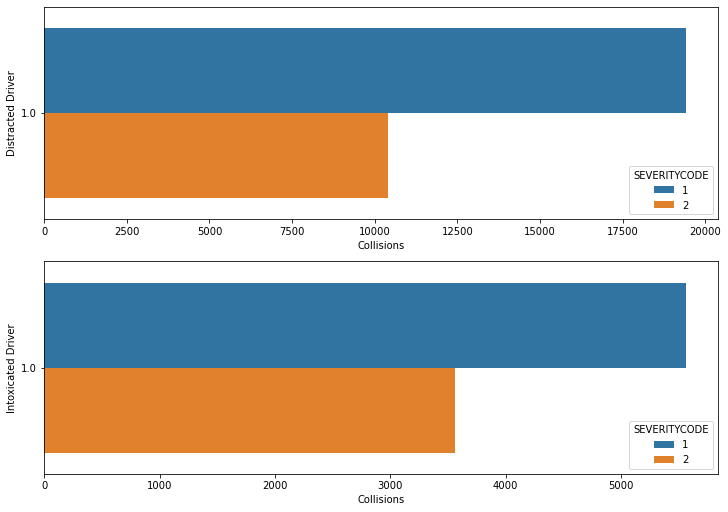

In [61]:
fig, ax = plt.subplots(2,1, figsize = (10, 7), constrained_layout=True)
ax1, ax2 = ax.flatten()

# Filter when the driver is distracted
sns.countplot(y="INATTENTIONIND", hue="SEVERITYCODE", data=df_explore[(df_explore.INATTENTIONIND == 1)], ax=ax1)
ax1.set(xlabel='Collisions', ylabel="Distracted Driver")

# Filter when driver is intoxicated
sns.countplot(y="UNDERINFL", hue="SEVERITYCODE", data=df_explore[(df_explore.UNDERINFL ==1)], ax=ax2)
ax2.set(xlabel='Collisions', ylabel="Intoxicated Driver")

## Collision Descriptors

['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']


<AxesSubplot:xlabel='COLLISIONTYPE', ylabel='count'>

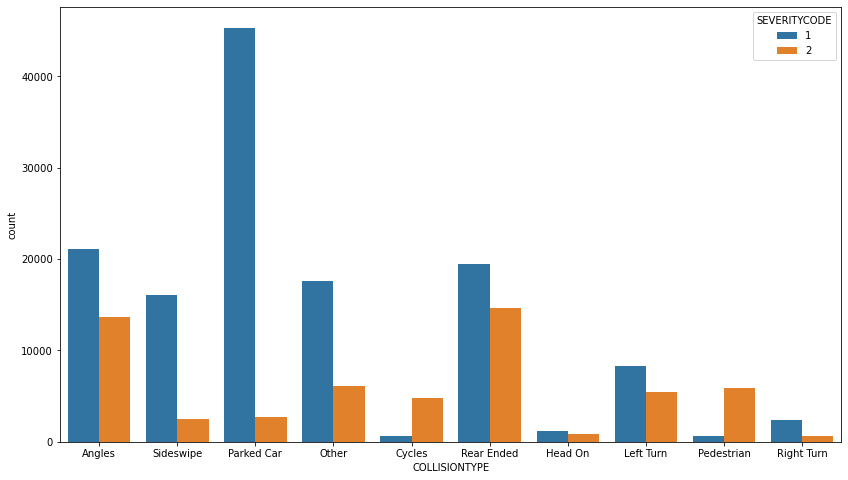

In [62]:
# These are a superset of SDOT collision types.  Also overlap with HITPARKEDCAR.
print(df['COLLISIONTYPE'].unique())
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="COLLISIONTYPE", hue="SEVERITYCODE", data=df, ax=ax)

[nan 'Y']


<AxesSubplot:xlabel='count', ylabel='SPEEDING'>

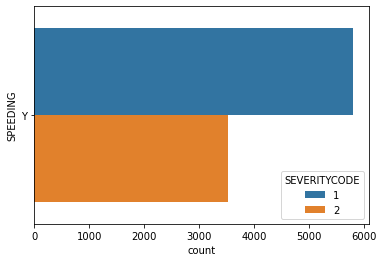

In [63]:
# Surprising there is not more speeding, but when there is there a good chance of injury
print(df['SPEEDING'].unique())
sns.countplot(y="SPEEDING", hue="SEVERITYCODE", data=df)

['N' 'Y']
N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64


<AxesSubplot:xlabel='count', ylabel='HITPARKEDCAR'>

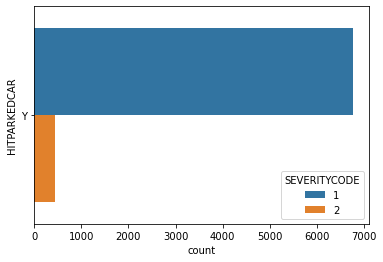

In [64]:
# When hitting a parked car there is little chance of injury
print(df['HITPARKEDCAR'].unique())
print(df['HITPARKEDCAR'].value_counts())
sns.countplot(y="HITPARKEDCAR", hue="SEVERITYCODE", data=df[(df.HITPARKEDCAR == 'Y')])

[nan 'Y']
Y    4667
Name: PEDROWNOTGRNT, dtype: int64


<AxesSubplot:xlabel='count', ylabel='PEDROWNOTGRNT'>

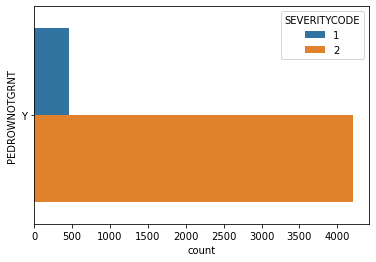

In [65]:
# When a pedestrian is not given right of way this is usually an injury
print(df['PEDROWNOTGRNT'].unique())
print(df['PEDROWNOTGRNT'].value_counts())
sns.countplot(y="PEDROWNOTGRNT", hue="SEVERITYCODE", data=df)

[11 16 14 51 13 26 28 18 34  0 24 69 12 21 23 29 27 48 15 55 33 56 54 31
 44 32 25 66 36 64 22 58 47 61 35 53 46 68 52]


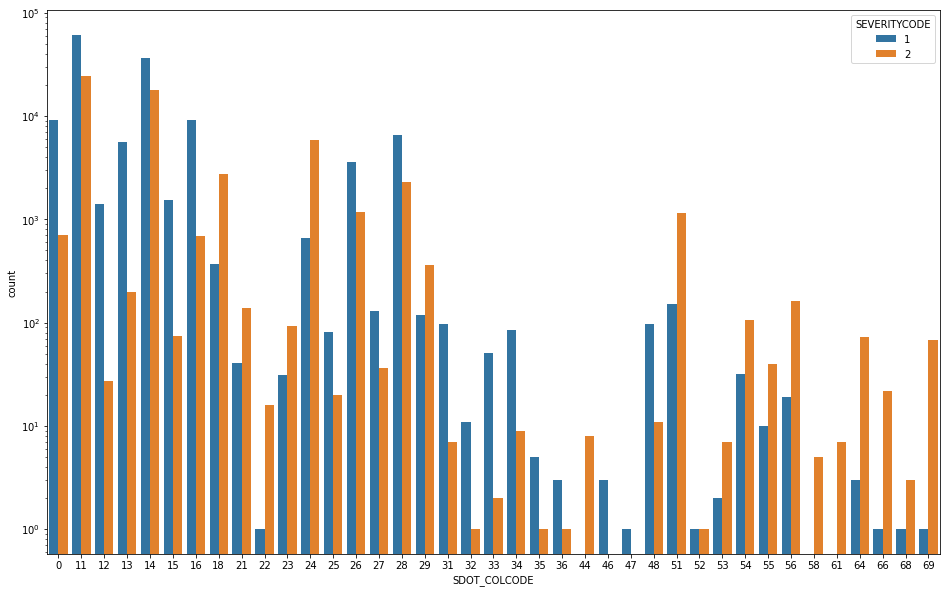

In [66]:
print(df['SDOT_COLCODE'].unique())
fig, ax = plt.subplots(figsize=(16,10))
g = sns.countplot(x="SDOT_COLCODE", hue="SEVERITYCODE", data=df, ax=ax)
#sns.violinplot(df['SDOT_COLCODE'], ax=ax)
g.set_yscale("log")

In [67]:
# SDOT and Washington State collision codes are different but representing the same thing.  So much for standardization.
# Use the SDOT codes only, do not use the state ones
df[{'SDOT_COLDESC','ST_COLDESC'}]

,SDOT_COLDESC,ST_COLDESC
0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle
1,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",From same direction - both going straight - bo...
2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",One parked--one moving
3,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",From same direction - all others
4,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle
...,...,...
194668,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",From opposite direction - both moving - head-on
194669,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",From same direction - both going straight - bo...
194670,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",From opposite direction - one left turn - one ...
194671,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Vehicle Strikes Pedalcyclist


In [68]:
# Not a clue what these are and no info to be found, not worth investigating
print(df['SEGLANEKEY'].unique())
print(df['SEGLANEKEY'].value_counts())

[    0  6855 25242 ... 11583 10319 45880]
0         191907
6532          19
6078          16
12162         15
10336         14
           ...  
35157          1
10817          1
15043          1
525169         1
16376          1
Name: SEGLANEKEY, Length: 1955, dtype: int64


## Data Understsanding Wrap-Up

Based on analysis of the data set we conclude the following attributes will make it into the model as features.
- Severity
    - **SEVERITYCODE**
    - ~~**SEVERITYDESC**~~ - nothing of value here
- Location, Time
    - ~~**INCDATE**~~ - out, this is redundant
    - ~~**INCDTTM**~~ - out, all date parts are not helpful to the model
    - ~~**X**~~ - out, these could be helpful for additional info but not for this study
    - ~~**Y**~~ - out, same as above
    - ~~**LOCATION**~~ - out, while containing a lot of detail is too complex to handle for this study
    - **ADDRTYPE** - in, one of the better features with solid correlation 
    - **JUNCTIONTYPE** - in, another good feature with solid correlation
    - ~~**INTKEY**~~ - out, this is key
    - ~~**CROSSWALKKEY**~~ - out, is key but has correlation to severity
- Situational Conditions
    - **WEATHER** - in, dropping most of the categories
    - **ROADCOND** - in, dropping most of the categories
    - **LIGHTCOND** - in, dropping most of the categories
- Counts
    - **VEHCOUNT** - in, there is some correlation here but need to consider overfitting
    - **PERSONCOUNT** - in, there are plenty of outliers here, clean-up needed
    - ~~**PEDCOUNT**~~ -  out, there is correlation here but not enough to sway the prediction
    - ~~**PEDCYLCOUNT**~~ - out, there is correlation here but not enough to sway the prediction
- Human Factors
    - **INATTENTIONIND** - in, not a strong correlation but helpful
    - **UNDERINFL** - in, not a strong correlation but helpful
- Collision Descriptors
    - **COLLISIONTYPE** - in, good correlation keep all of the categories here
    - **SPEEDING** - in, there's not a lot here but there is a correlation
    - ~~**SEGLANEKEY**~~ - out, there's no info on what these are does not help with severity
    - **HITPARKEDCAR** - in, helps with severity, it's not as severe when a parked car is involved
    - **PEDROWNOTGRNT** - in, there's almost always an injury when this is set
    - **SDOTCOLNUM** - out, key
    - ~~**SDOT_COLCODE**~~ - in, SDOT code used to describe the collision
    - ~~**SDOT_COLDESC**~~ - out, no need for the description
    - ~~**ST_COLCODE**~~ - out, overlap with SDOT_COLCODE
    - ~~**ST_COLDESC**~~


# Data Preparation

In [69]:
# Get a fresh read on the data file
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv",\
                low_memory = False)
print('File downloaded')

File downloaded


In [70]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [71]:
df.drop(columns=['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC'
                      ,'SEVERITYCODE.1','SEVERITYDESC','INCDATE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY',
                      'CROSSWALKKEY', 'PEDCOUNT','PEDCYLCOUNT','INCDTTM','ST_COLCODE','LOCATION'],inplace=True)


In [72]:
# Apply major clean-up here
df["SEVERITYCODE"]=df["SEVERITYCODE"].apply(lambda x : 0 if x==1 else 1)
df["HITPARKEDCAR"]=df["HITPARKEDCAR"].apply(lambda x : 1 if x=="Y" else 0)
df["PEDROWNOTGRNT"]=df["PEDROWNOTGRNT"].apply(lambda x : 1 if x=="Y" else 0)
df["SPEEDING"]=df["SPEEDING"].apply(lambda x : 1 if x=="Y" else 0)
df["INATTENTIONIND"]=df["INATTENTIONIND"].apply(lambda x : 1 if x=="Y" else 0)
df["UNDERINFL"]=df["UNDERINFL"].fillna(0).apply(lambda x : 1 if x =='Y' else (0 if x == 'N' else int(x)))

#df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
#df['SDOT_COLCODE'] = df['SDOT_COLCODE'].fillna('0.0').astype('float64')
#avg_X = df["X"].astype("float").mean()
#df["X"].fillna(avg_X, inplace=True)
#avg_Y = df["Y"].astype("float").mean()
#df["Y"].fillna(avg_Y, inplace=True)

In [73]:
df_features = df.copy()

In [74]:
df_features.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'HITPARKEDCAR'],
      dtype='object')

In [75]:
df_features["WEATHER"]= df_features["WEATHER"].apply(lambda x: "OVERCAST" if x == "Overcast"\
                                                     else ("RAINING" if x == "Raining"\
                                                           else ("CLEAR" if x == "Clear"\
                                                                 else ("UNKNOWN" if x =="Unknown" else "NOISE" ))))

In [76]:
df_features["ROADCOND"]= df_features["ROADCOND"].apply(lambda x: "DRY" if x == "Dry"\
                                                       else ("WET" if x == "Wet"\
                                                             else ("UNKNOWN" if x =="Unknown"\
                                                                   else "NOISE" )))

In [77]:
df_features["LIGHTCOND"]= df_features["LIGHTCOND"].apply(lambda x: "DAYLIGHT" if x == "Daylight" \
                                                         else ("DARK-STREET-LIGHTS-ON" if x == "Dark - Street Lights On" \
                                                               else ("UNKNOWN" if x == "Unknown" \
                                                                     else ("DUSK" if x =="Dusk" \
                                                                           else "NOISE" ))))

In [78]:
df_features["JUNCTIONTYPE"]= df_features["JUNCTIONTYPE"].apply(lambda x: "MID-BLOCK-UNRELATED" if x == "Mid-Block (not related to intersection)"\
                                                               else ("INTERSECTION-RELATED" if x == "At Intersection (intersection related)"\
                                                                     else ("MID-BLOCK-RELATED" if x == "Mid-Block (but intersection related)"\
                                                                           else ("DRIVEWAY" if x =="Driveway Junction" else"NOISE" ))))

In [79]:
df_features["ADDRTYPE"]=df_features["ADDRTYPE"].apply(lambda x : 0 if x=='Block' else 1)
#df_features['ADDRTYPE'] = \
#df_features['ADDRTYPE'].fillna('Block').replace(\
#                                       ['Alley', 'Block', 'Intersection'], ['0', '1', '1']).astype('float64')

In [80]:
df_features['COLLISIONTYPE'] = \
df_features['COLLISIONTYPE'].fillna('Other').replace(\
                                            ['Angles','Cycles','Head On', 'Left Turn', 'Other', 'Parked Car',\
                                             'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe'],\
                                            ['0','1','2','3','4','5','6','7','8','9']).astype('float64')

In [81]:
df_features.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
HITPARKEDCAR      0
dtype: int64

In [82]:
#df_features.isnull().sum()
rs = np.random.RandomState(0)
corr = df_features.corr()
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
SEVERITYCODE,1.00,0.18,-0.13,0.13,-0.05,0.19,0.05,0.04,0.21,0.04,-0.10
ADDRTYPE,0.18,1.00,-0.46,0.06,-0.08,-0.07,-0.08,-0.04,0.15,-0.06,-0.12
COLLISIONTYPE,-0.13,-0.46,1.00,0.02,0.11,-0.00,0.12,0.00,-0.02,-0.00,0.03
PERSONCOUNT,0.13,0.06,0.02,1.00,0.38,-0.13,0.08,0.02,-0.03,-0.00,-0.05
VEHCOUNT,-0.05,-0.08,0.11,0.38,1.00,-0.37,0.08,0.01,-0.23,-0.03,0.05
SDOT_COLCODE,0.19,-0.07,-0.00,-0.13,-0.37,1.00,0.03,0.11,0.24,0.14,-0.10
INATTENTIONIND,0.05,-0.08,0.12,0.08,0.08,0.03,1.00,-0.03,-0.03,-0.05,0.01
UNDERINFL,0.04,-0.04,0.00,0.02,0.01,0.11,-0.03,1.00,-0.02,0.09,0.01
PEDROWNOTGRNT,0.21,0.15,-0.02,-0.03,-0.23,0.24,-0.03,-0.02,1.00,-0.03,-0.03
SPEEDING,0.04,-0.06,-0.00,-0.00,-0.03,0.14,-0.05,0.09,-0.03,1.00,-0.03


In [83]:
# One Hot Encoding for categorical columns
df_features = pd.get_dummies(df_features,columns=['WEATHER','COLLISIONTYPE','JUNCTIONTYPE',\
                                                  'ROADCOND','LIGHTCOND'])

In [84]:
df_features.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'HITPARKEDCAR', 'WEATHER_CLEAR', 'WEATHER_NOISE', 'WEATHER_OVERCAST',
       'WEATHER_RAINING', 'WEATHER_UNKNOWN', 'COLLISIONTYPE_0.0',
       'COLLISIONTYPE_1.0', 'COLLISIONTYPE_2.0', 'COLLISIONTYPE_3.0',
       'COLLISIONTYPE_4.0', 'COLLISIONTYPE_5.0', 'COLLISIONTYPE_6.0',
       'COLLISIONTYPE_7.0', 'COLLISIONTYPE_8.0', 'COLLISIONTYPE_9.0',
       'JUNCTIONTYPE_DRIVEWAY', 'JUNCTIONTYPE_INTERSECTION-RELATED',
       'JUNCTIONTYPE_MID-BLOCK-RELATED', 'JUNCTIONTYPE_MID-BLOCK-UNRELATED',
       'JUNCTIONTYPE_NOISE', 'ROADCOND_DRY', 'ROADCOND_NOISE',
       'ROADCOND_UNKNOWN', 'ROADCOND_WET', 'LIGHTCOND_DARK-STREET-LIGHTS-ON',
       'LIGHTCOND_DAYLIGHT', 'LIGHTCOND_DUSK', 'LIGHTCOND_NOISE',
       'LIGHTCOND_UNKNOWN'],
      dtype='object')

In [85]:
# Remove the noise
df_features.drop(columns=["JUNCTIONTYPE_NOISE", "LIGHTCOND_NOISE","ROADCOND_NOISE",\
                          "WEATHER_NOISE"],axis=1,inplace=True)

In [86]:
df_features.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,...,JUNCTIONTYPE_INTERSECTION-RELATED,JUNCTIONTYPE_MID-BLOCK-RELATED,JUNCTIONTYPE_MID-BLOCK-UNRELATED,ROADCOND_DRY,ROADCOND_UNKNOWN,ROADCOND_WET,LIGHTCOND_DARK-STREET-LIGHTS-ON,LIGHTCOND_DAYLIGHT,LIGHTCOND_DUSK,LIGHTCOND_UNKNOWN
0,1,1,2,2,11,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,2,2,16,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,0,0,4,3,14,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0,0,3,3,11,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,1,1,2,2,11,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# Modeling

Use random under sampling to balance severity.  RUS randomly removes samples from the majority class (SEVERITYCODE == 1) to equal the minority class (SEVERITYCODE == 2).  The balancing has a significant effect on all of the models used below.  Without using this Decision Tree, KNN, Logistics Regression and Random Forest do not perform well at all.  On the other hand XGBoost and GBT positive weight parameters are don't make a difference so it levels the playing field.  Without balancing XGB and GBT perform very well but we balance per the requirements and allow for all of the classifiers to have a shot at being the best at predicting severity == injury.

In [87]:
def print_model_score_summary(y, yhat, acc, jac, f1, ll):
    print (classification_report(y, yhat))
    print ("Acc Score: ", acc)
    print ("f1 Score: ", f1)
    print ("Jaccard Score: ", jac)
    print ("Log Loss: ", ll)

In [88]:
def plot_feature_importances(model, x_columns, title):
    # Display most significant features
    fig, ax = plt.subplots(figsize=(6,6))
    plt.xticks(
        rotation=90, 
        horizontalalignment='center',
        fontweight='light',
        fontsize='large'  
    )
    df_feature_importances = pd.Series(model.feature_importances_, index=x_columns.columns).sort_values(ascending=False)
    sns.barplot(y=df_feature_importances[:10],x=df_feature_importances.index[:10], ax=ax)
    #plt.xlabel('Feature Importances')
    #plt.ylabel('Gini Importance')
    plt.title(title)
    plt.show()
    return

In [89]:
# plot_confusion_matrix(y_test, XGB_yhat, XGB_model.classes_, title='XGBoost Confusion Matrix', accuracy=XGB_score_jac)
def plot_confusion_matrix(y_true, y_pred, labels, filename='', title='Confusion Matrix', accuracy=0.0, ymap=None, figsize=(6,4)):
    # https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)

    if accuracy == 0:
        ax.set_title(title, pad=10)
    else:
        ax.set_title(title + '\nAccuracy: ' + str(accuracy), pad=10)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, annot_kws={"fontsize":18})
    if len(filename) != 0:
        plt.savefig(filename)
    plt.show()

In [90]:
run_data_balanced = True

In [91]:
df_features.columns.values

array(['SEVERITYCODE', 'ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
       'SPEEDING', 'HITPARKEDCAR', 'WEATHER_CLEAR', 'WEATHER_OVERCAST',
       'WEATHER_RAINING', 'WEATHER_UNKNOWN', 'COLLISIONTYPE_0.0',
       'COLLISIONTYPE_1.0', 'COLLISIONTYPE_2.0', 'COLLISIONTYPE_3.0',
       'COLLISIONTYPE_4.0', 'COLLISIONTYPE_5.0', 'COLLISIONTYPE_6.0',
       'COLLISIONTYPE_7.0', 'COLLISIONTYPE_8.0', 'COLLISIONTYPE_9.0',
       'JUNCTIONTYPE_DRIVEWAY', 'JUNCTIONTYPE_INTERSECTION-RELATED',
       'JUNCTIONTYPE_MID-BLOCK-RELATED',
       'JUNCTIONTYPE_MID-BLOCK-UNRELATED', 'ROADCOND_DRY',
       'ROADCOND_UNKNOWN', 'ROADCOND_WET',
       'LIGHTCOND_DARK-STREET-LIGHTS-ON', 'LIGHTCOND_DAYLIGHT',
       'LIGHTCOND_DUSK', 'LIGHTCOND_UNKNOWN'], dtype=object)

In [92]:
if run_data_balanced == True:
    X_unbalanced = df_features[['ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT',
           'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
           'SPEEDING', 'HITPARKEDCAR', 'WEATHER_CLEAR', 'WEATHER_OVERCAST',
           'WEATHER_RAINING', 'WEATHER_UNKNOWN', 'COLLISIONTYPE_0.0',
           'COLLISIONTYPE_1.0', 'COLLISIONTYPE_2.0', 'COLLISIONTYPE_3.0',
           'COLLISIONTYPE_4.0', 'COLLISIONTYPE_5.0', 'COLLISIONTYPE_6.0',
           'COLLISIONTYPE_7.0', 'COLLISIONTYPE_8.0', 'COLLISIONTYPE_9.0',
           'JUNCTIONTYPE_DRIVEWAY', 'JUNCTIONTYPE_INTERSECTION-RELATED',
           'JUNCTIONTYPE_MID-BLOCK-RELATED',
           'JUNCTIONTYPE_MID-BLOCK-UNRELATED', 'ROADCOND_DRY',
           'ROADCOND_UNKNOWN', 'ROADCOND_WET',
           'LIGHTCOND_DARK-STREET-LIGHTS-ON', 'LIGHTCOND_DAYLIGHT',
           'LIGHTCOND_DUSK', 'LIGHTCOND_UNKNOWN']]
    y_unbalanced = df_features['SEVERITYCODE']
    RUS = RandomUnderSampler(random_state=12)
    X, y = RUS.fit_resample(X_unbalanced, y_unbalanced)
    #print(X[0:5])
else:
    y = df_features['SEVERITYCODE'].values
    X = df_features.copy()
    X.drop(['SEVERITYCODE'], axis=1, inplace=True)

print(X.shape)
print(y.shape)
print(df_features.shape)

(116376, 34)
(116376,)
(194673, 35)


In [93]:
X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)
print ('Train Set:', X_train.shape,  y_train.shape)
print ('Test Set:', X_test.shape,  y_test.shape)

Train Set: (93100, 34) (93100,)
Test Set: (23276, 34) (23276,)


## XGBoost

In [95]:
# Tuning
#weight = int(y_train.value_counts()[0]/y_train.value_counts()[1])
#print(weight)

#parameters = {
#    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
#    "max_depth" : [3,4,5,6,8,10,12,15,20],
#    "min_child_weight": [1,3,5,7],
#    "gamma":[0.1,0.2,0.3,0.4],
#    "colsample_bytree":[0.3,0.4,0.5,0.7],
#    "scale_pos_weight":[2,2.2,2.5,2.7,2.9,3]
#}
#XGB_model = XGBClassifier()
#random_search = RandomizedSearchCV(XGB_model, param_distributions = parameters, n_iter = 5, n_jobs = -1,\
#                                   cv=5, verbose = 3, scoring = 'f1')
#random_search.fit(X_train, y_train)
#random_search.best_estimator_

In [96]:
scale_pos_weight = df_features[df_features.SEVERITYCODE==0]\
['SEVERITYCODE'].count()/df_features[df_features.SEVERITYCODE==1]['SEVERITYCODE'].count() 
scale_pos_weight

2.3455867189111155

In [97]:
# Override weight based on optimization
print ('Balanced -' + str(run_data_balanced))

scale_pos_weight = 2.7

XGB_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=scale_pos_weight, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGB_model.fit(X_train, y_train)
XGB_yhat = XGB_model.predict(X_test)
XGB_yhat_prob = XGB_model.predict_proba(X_test)

Balanced -True


              precision    recall  f1-score   support

           0       0.90      0.41      0.56     11638
           1       0.62      0.95      0.75     11638

    accuracy                           0.68     23276
   macro avg       0.76      0.68      0.65     23276
weighted avg       0.76      0.68      0.65     23276

Acc Score:  0.6800137480666781
f1 Score:  0.653896035316731
Jaccard Score:  0.5986852739910555
Log Loss:  0.6012696644921443


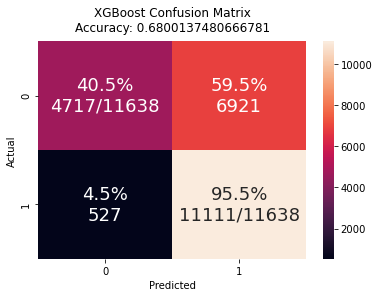

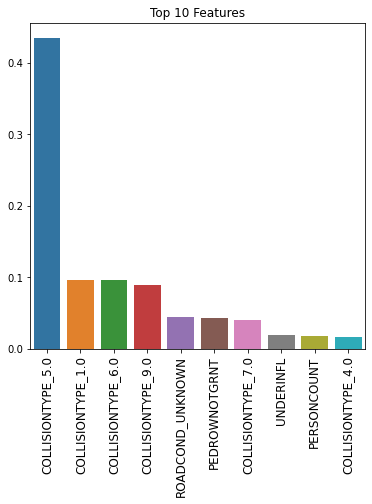

In [98]:
XGB_score_acc = accuracy_score(y_test, XGB_yhat)
XGB_score_jac = jaccard_score(y_test, XGB_yhat)
XGB_score_f1 = f1_score(y_test, XGB_yhat, average='weighted')
XGB_score_ll = log_loss(y_test, XGB_yhat_prob)

# Summary
#print("Train Set Accuracy: ", metrics.accuracy_score(y_train, XGB_model.predict(X_train)))
print_model_score_summary(y_test, XGB_yhat, XGB_score_acc, XGB_score_jac, XGB_score_f1, XGB_score_ll)

XGB_roc_auc = roc_auc_score(y_test, XGB_model.predict(X_test))
XGB_fpr, XGB_tpr, XGB_thresholds = roc_curve(y_test, XGB_model.predict_proba(X_test)[:,1])

XGB_tn, XGB_fp, XGB_fn, XGB_tp = confusion_matrix(y_test, XGB_yhat).ravel()
plot_confusion_matrix(y_test, XGB_yhat, XGB_model.classes_, title='XGBoost Confusion Matrix',\
                      accuracy=XGB_score_acc)

plot_feature_importances(XGB_model, X_unbalanced, 'Top 10 Features')

## Gradient Boosting Trees

In [99]:
# GBT Tuning
#parameters = {'learning_rate': [0.15,0.1,0.05,0.01,0.005,0.001],
#              'subsample'    : [0.7,0.75,0.8,0.85,0.9,0.95,1],
#              'n_estimators' : [100,250,500,750,1000,1250,1500,1750],
#              'min_samples_split':[2,4,6,8,10,20,40,60,100],
#              'min_samples_leaf':[1,3,5,7,9],
#              'max_depth'    : [2,3,4,5,6,7]
#             }

#parameters = {'learning_rate': [0.15,0.1,0.05,0.01,0.005,0.001],
#              'n_estimators' : [100,250,500,750,1000,1250,1500,1750]
#             }

#tuning = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4, min_samples_split = 2,\
#                                                           min_samples_leaf = 1, max_features = 'sqrt',\
#                                                           random_state = 10),\
#                      param_grid = parameters, scoring='accuracy', n_jobs=4, iid=False, cv=5)
#tuning.fit(X_train,y_train)
#tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [100]:
print ('Balanced -' + str(run_data_balanced))
sample_weights = np.zeros(len(y_train))
if run_data_balanced == True:
    sample_weights[y_train == 0] = 0.50
    sample_weights[y_train == 1] = 0.50
else:
    sample_weights[y_train == 0] = 0.2989
    sample_weights[y_train == 1] = 0.7011

sample_weights[y_train == 0] = 0.2989
sample_weights[y_train == 1] = 0.7011
GBT_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, \
                                       random_state=0).fit(X_train, y_train, sample_weight=sample_weights)
GBT_yhat = GBT_model.predict(X_test)
GBT_yhat_prob = GBT_model.predict_proba(X_test)

Balanced -True


              precision    recall  f1-score   support

           0       0.89      0.38      0.54     11638
           1       0.61      0.95      0.74     11638

    accuracy                           0.67     23276
   macro avg       0.75      0.67      0.64     23276
weighted avg       0.75      0.67      0.64     23276

Acc Score:  0.6688434438907028
f1 Score:  0.639448599632245
Jaccard Score:  0.5903268668615467
Log Loss:  0.597680223709879


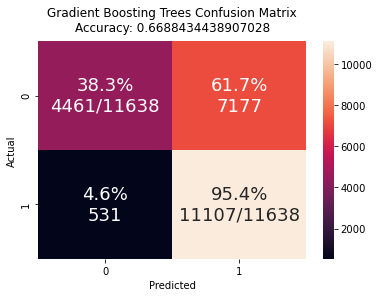

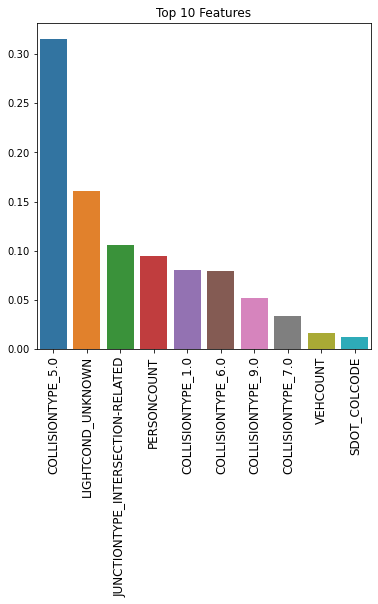

In [101]:
GBT_score_acc = accuracy_score(y_test, GBT_yhat)
GBT_score_jac = jaccard_score(y_test, GBT_yhat)
GBT_score_f1 = f1_score(y_test, GBT_yhat, average='weighted')
GBT_score_ll = log_loss(y_test, GBT_yhat_prob)

print_model_score_summary(y_test, GBT_yhat, GBT_score_acc, GBT_score_jac, GBT_score_f1, GBT_score_ll)
#print("Train Set Accuracy: ", metrics.accuracy_score(y_train, GBT_model.predict(X_train)))

GBT_roc_auc = roc_auc_score(y_test, GBT_model.predict(X_test))
GBT_fpr, GBT_tpr, GBT_thresholds = roc_curve(y_test, GBT_model.predict_proba(X_test)[:,1])

GBT_tn, GBT_fp, GBT_fn, GBT_tp = confusion_matrix(y_test, GBT_yhat).ravel()
plot_confusion_matrix(y_test, GBT_yhat, GBT_model.classes_, title = 'Gradient Boosting Trees Confusion Matrix',\
                      accuracy = GBT_score_acc)

plot_feature_importances(GBT_model, X_unbalanced, 'Top 10 Features')

## Logistic Regression

Balanced -True
              precision    recall  f1-score   support

           0       0.76      0.62      0.68     11638
           1       0.68      0.81      0.74     11638

    accuracy                           0.71     23276
   macro avg       0.72      0.71      0.71     23276
weighted avg       0.72      0.71      0.71     23276

Acc Score:  0.7109039353840866
f1 Score:  0.7083194413068644
Jaccard Score:  0.5819977636973537
Log Loss:  0.5340200403747097


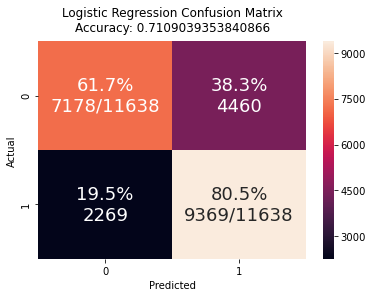

In [102]:
print ('Balanced -' + str(run_data_balanced))
LR_model = LogisticRegression(C = 0.1, solver = 'liblinear', class_weight = 'balanced').fit(X_train, y_train)
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)

LR_score_acc = accuracy_score(y_test, LR_yhat)
LR_score_jac = jaccard_score(y_test, LR_yhat)
LR_score_f1 = f1_score(y_test, LR_yhat, average = 'weighted')
LR_score_ll = log_loss(y_test, LR_yhat_prob)

#print("Train Set Accuracy: ", metrics.accuracy_score(y_train, LR_model.predict(X_train)))
print_model_score_summary(y_test, LR_yhat, LR_score_acc, LR_score_jac, LR_score_f1, LR_score_ll)

LR_roc_auc = roc_auc_score(y_test, LR_model.predict(X_test))
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR_model.predict_proba(X_test)[:,1])

LR_tn, LR_fp, LR_fn, LR_tp = confusion_matrix(y_test, LR_yhat).ravel()
plot_confusion_matrix(y_test, LR_yhat, LR_model.classes_, title = 'Logistic Regression Confusion Matrix',\
                      accuracy = LR_score_acc)

## Random Forest

In [103]:
# Tuning
#parameters = {'n_estimators':[499,500,501]}
#             #'criterion':('gini'),
#             #'max_depth':[8,10]}
#            # 'max_features':('auto','sqrt')}
#            
#RF_model = RandomForestClassifier(n_jobs=-1, random_state=140, max_features='auto', max_depth=10)
#RF_grid = GridSearchCV(RF_model, param_grid=parameters, verbose=10, n_jobs=-1)
#RF_grid.fit(X_train,y_train)
#print(RF_grid.best_params_)
#print(RF_grid.best_score_)
#RF_grid_pred = RF_grid.predict(X_test)
#print(classification_report(y_test, RF_grid_pred))

In [104]:
print ('Balanced -' + str(run_data_balanced))
RF_model = RandomForestClassifier(n_estimators = 500, criterion = 'gini', n_jobs = -1,\
                                  random_state = 140, max_features = 'auto', max_depth=10)
RF_model.fit(X_train,y_train)
RF_yhat = RF_model.predict(X_test)
RF_yhat_prob = RF_model.predict_proba(X_test)

Balanced -True


              precision    recall  f1-score   support

           0       0.76      0.65      0.70     11638
           1       0.69      0.80      0.74     11638

    accuracy                           0.72     23276
   macro avg       0.73      0.72      0.72     23276
weighted avg       0.73      0.72      0.72     23276

Acc Score:  0.7214297989345249
f1 Score:  0.7197984768425859
Jaccard Score:  0.5887874175545409
Log Loss:  0.5283547668311019


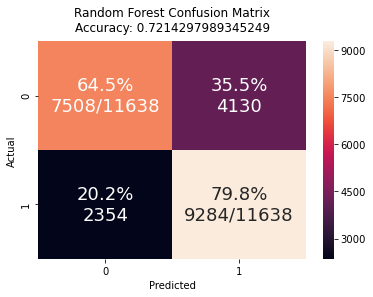

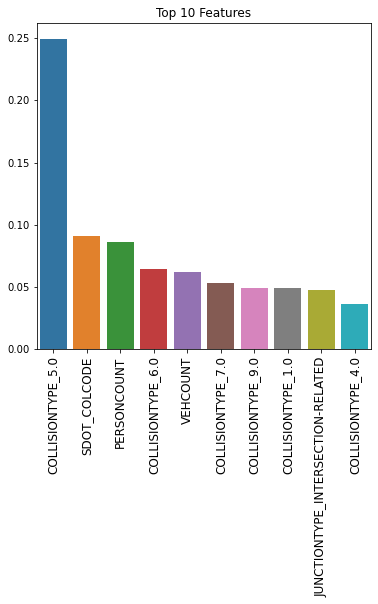

In [105]:
RF_score_acc = accuracy_score(y_test, RF_yhat)
RF_score_jac = jaccard_score(y_test, RF_yhat)
RF_score_f1 = f1_score(y_test, RF_yhat, average='weighted')
RF_score_ll = log_loss(y_test, RF_yhat_prob)

#print("Train Set Accuracy: ", metrics.accuracy_score(y_train, RF_model.predict(X_train)))
print_model_score_summary(y_test, RF_yhat, RF_score_acc, RF_score_jac, RF_score_f1, RF_score_ll)

RF_roc_auc = roc_auc_score(y_test, RF_model.predict(X_test))
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])

RF_tn, RF_fp, RF_fn, RF_tp = confusion_matrix(y_test, RF_yhat).ravel()
plot_confusion_matrix(y_test, RF_yhat, RF_model.classes_, title='Random Forest Confusion Matrix',\
                      accuracy = RF_score_acc)

plot_feature_importances(RF_model, X_unbalanced, 'Top 10 Features')

## k-Nearest Neighbors

In [106]:
# Tuning
#Ks = 15
#Ks = 2
#mean_acc = np.zeros((Ks-1))
#std_acc = np.zeros((Ks-1))

#for n in range(1, Ks):
#    print("K -", n)
#    KNN_model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
#    KNN_yhat = KNN_model.predict(X_test)
#    mean_acc[n-1] = metrics.accuracy_score(y_test, KNN_yhat)
#    std_acc[n-1] = np.std(KNN_yhat == y_test) / np.sqrt(KNN_yhat.shape[0])
#mean_acc
#print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)
#plt.plot(range(1, Ks),mean_acc)
#plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))
#plt.ylabel('Accuracy')
#plt.xlabel('Neighbors')
#plt.tight_layout()
#plt.show()

In [107]:
KNN_score_f1 = KNN_score_jac = KNN_score_ll = KNN_roc_auc = KNN_fpr = KNN_tpr = KNN_thresholds = KNN_tn = KNN_fp = KNN_fn = KNN_tp = 0

In [108]:
#k = mean_acc.argmax() + 1
k = 10
#KNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
#KNN_yhat = KNN_model.predict(X_test)
#KNN_yhat_prob = KNN_model.predict_proba(X_test)

#KNN_score_acc = accuracy_score(y_test, KNN_yhat)
#KNN_score_jac = jaccard_score(y_test, KNN_yhat)
#KNN_score_f1 = f1_score(y_test, KNN_yhat, average='weighted')
#KNN_score_ll = log_loss(y_test, KNN_yhat_prob)

# Summary
#print("Train Set Accuracy: ", metrics.accuracy_score(y_train, KNN_model.predict(X_train)))
#print_model_score_summary(y_test, KNN_yhat, KNN_score_acc, KNN_score_jac, KNN_score_f1, KNN_score_ll)

#KNN_roc_auc = roc_auc_score(y_test, KNN_model.predict(X_test))
#KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test)[:,1])

#KNN_tn, KNN_fp, KNN_fn, KNN_tp = confusion_matrix(y_test, KNN_yhat).ravel()
#plot_confusion_matrix(y_test, KNN_yhat, KNN_model.classes_, title = 'KNN Confusion Matrix',\
#                      accuracy = KNN_score_acc)

## Decision Tree

Balanced - True
              precision    recall  f1-score   support

           0       0.85      0.45      0.59     11638
           1       0.63      0.92      0.74     11638

    accuracy                           0.69     23276
   macro avg       0.74      0.69      0.67     23276
weighted avg       0.74      0.69      0.67     23276

Acc Score:  0.6855129747379275
f1 Score:  0.6675813008804221
Jaccard Score:  0.5933559246708516
Log Loss:  0.5514610397680975


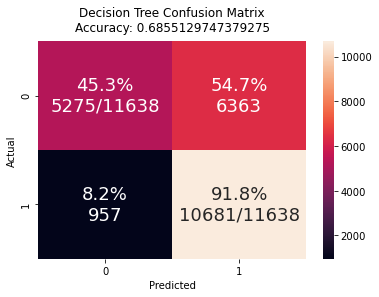

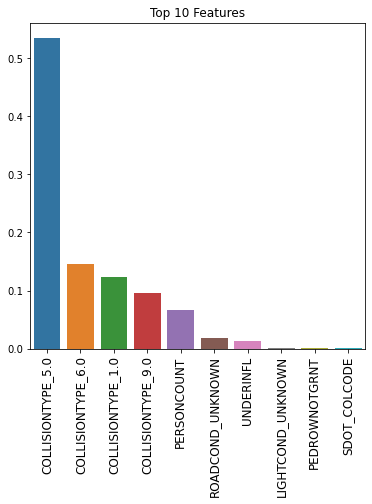

In [109]:
print ('Balanced - ' + str(run_data_balanced))

DT_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
DT_model.fit(X_train, y_train)
DT_yhat = DT_model.predict(X_test)
DT_yhat_prob = DT_model.predict_proba(X_test)

DT_score_acc = accuracy_score(y_test, DT_yhat)
DT_score_jac = jaccard_score(y_test, DT_yhat)
DT_score_f1 = f1_score(y_test, DT_yhat, average='weighted')
DT_score_ll = log_loss(y_test, DT_yhat_prob)

#print("Train Set Accuracy: ", metrics.accuracy_score(y_train, DT_model.predict(X_train)))
print_model_score_summary(y_test, DT_yhat, DT_score_acc, DT_score_jac, DT_score_f1, DT_score_ll)

DT_roc_auc = roc_auc_score(y_test, DT_model.predict(X_test))
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, DT_model.predict_proba(X_test)[:,1])

DT_tn, DT_fp, DT_fn, DT_tp = confusion_matrix(y_test, DT_yhat).ravel()
plot_confusion_matrix(y_test, DT_yhat, DT_model.classes_, title = 'Decision Tree Confusion Matrix',\
                      accuracy = DT_score_acc)

plot_feature_importances(DT_model, X_unbalanced, 'Top 10 Features')

# Evaluation

In [110]:
def color_best_max(s):
    max = s == s.max()
    return ['font-weight: bold; color: green' if i else '' for i in max]

def color_best_min(s):
    min = s == s.min()
    return ['font-weight: bold; color: green' if i else '' for i in min]

def color_worst_max(s):
    max = s == s.max()
    return ['font-weight: bold; color: red' if i else '' for i in max]

def color_worst_min(s):
    min = s == s.min()
    return ['font-weight: bold; color: red' if i else '' for i in min]

In [111]:
results = pd.DataFrame(np.array([['Gradient Boosting Trees', GBT_score_acc, GBT_score_jac, GBT_score_f1, GBT_score_ll, GBT_tn, GBT_fp, GBT_fn, GBT_tp], \
                                 ['XGBoost', XGB_score_acc, XGB_score_jac, XGB_score_f1, XGB_score_ll, XGB_tn, XGB_fp, XGB_fn, XGB_tp], \
                                 ['Random Forest', RF_score_acc, RF_score_jac, RF_score_f1, RF_score_ll, RF_tn, RF_fp, RF_fn, RF_tp], \
#                                 ['k-Nearest Neighbors', KNN_score_acc, KNN_score_jac, KNN_score_f1, KNN_score_ll, KNN_tn, KNN_fp, KNN_fn, KNN_tp], \
                                 ['Decision Tree', DT_score_acc, DT_score_jac, DT_score_f1, DT_score_ll, DT_tn, DT_fp, DT_fn, DT_tp], \
                                 ['Logistic Regression', LR_score_acc, LR_score_jac, LR_score_f1, LR_score_ll, LR_tn, LR_fp, LR_fn, LR_tp]]), \
                                columns=['Model', 'Accuracy', 'Jaccard', 'F1-Score', 'Log Loss', 'True -', 'False +', 'False -', 'True +'])

results[['Accuracy', 'Jaccard', 'F1-Score', 'Log Loss']] = results[['Accuracy', 'Jaccard', 'F1-Score', 'Log Loss']].astype(float)
results[['True -', 'False +', 'False -', 'True +']] = results[['True -', 'False +', 'False -', 'True +']].astype(int)

# Formatting the table in Pandas in a PITA
results = results.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}]).\
apply(color_best_max, subset=['Accuracy', 'Jaccard', 'F1-Score', 'True -', 'True +']).\
apply(color_worst_min, subset=['Accuracy', 'Jaccard', 'F1-Score', 'True -', 'True +']).\
apply(color_best_min, subset=['Log Loss', 'False +', 'False -']).\
apply(color_worst_max, subset=['Log Loss', 'False +', 'False -'])

results

,Model,Accuracy,Jaccard,F1-Score,Log Loss,True -,False +,False -,True +
0,Gradient Boosting Trees,0.668843,0.590327,0.639449,0.597680,4461,7177,531,11107
1,XGBoost,0.680014,0.598685,0.653896,0.601270,4717,6921,527,11111
2,Random Forest,0.721430,0.588787,0.719798,0.528355,7508,4130,2354,9284
3,Decision Tree,0.685513,0.593356,0.667581,0.551461,5275,6363,957,10681
4,Logistic Regression,0.710904,0.581998,0.708319,0.534020,7178,4460,2269,9369


In [112]:
results = pd.DataFrame(np.array([['Gradient Boosting Trees', GBT_score_acc, GBT_score_jac, GBT_score_f1, GBT_score_ll, GBT_tn, GBT_fp, GBT_fn, GBT_tp], \
                                 ['XGBoost', XGB_score_acc, XGB_score_jac, XGB_score_f1, XGB_score_ll, XGB_tn, XGB_fp, XGB_fn, XGB_tp], \
                                 ['Random Forest', RF_score_acc, RF_score_jac, RF_score_f1, RF_score_ll, RF_tn, RF_fp, RF_fn, RF_tp], \
#                                 ['k-Nearest Neighbors', KNN_score_acc, KNN_score_jac, KNN_score_f1, KNN_score_ll, KNN_tn, KNN_fp, KNN_fn, KNN_tp], \
                                 ['Decision Tree', DT_score_acc, DT_score_jac, DT_score_f1, DT_score_ll, DT_tn, DT_fp, DT_fn, DT_tp], \
                                 ['Logistic Regression', LR_score_acc, LR_score_jac, LR_score_f1, LR_score_ll, LR_tn, LR_fp, LR_fn, LR_tp]]), \
                                columns=['Model', 'Accuracy', 'Jaccard', 'F1-Score', 'Log Loss', 'True -', 'False +', 'False -', 'True +'])

results[['Accuracy', 'Jaccard', 'F1-Score', 'Log Loss']] = results[['Accuracy', 'Jaccard', 'F1-Score', 'Log Loss']].astype(float)
results[['True -', 'False +', 'False -', 'True +']] = results[['True -', 'False +', 'False -', 'True +']].astype(int)

results.describe()

,Accuracy,Jaccard,F1-Score,Log Loss,True -,False +,False -,True +
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.693341,0.590631,0.677809,0.562557,5827.800000,5810.200000,1327.600000,10310.400000
std,0.022003,0.006130,0.034792,0.034784,1418.953734,1418.953734,915.506308,915.506308
min,0.668843,0.581998,0.639449,0.528355,4461.000000,4130.000000,527.000000,9284.000000
25%,0.680014,0.588787,0.653896,0.534020,4717.000000,4460.000000,531.000000,9369.000000
50%,0.685513,0.590327,0.667581,0.551461,5275.000000,6363.000000,957.000000,10681.000000
75%,0.710904,0.593356,0.708319,0.597680,7178.000000,6921.000000,2269.000000,11107.000000
max,0.721430,0.598685,0.719798,0.601270,7508.000000,7177.000000,2354.000000,11111.000000


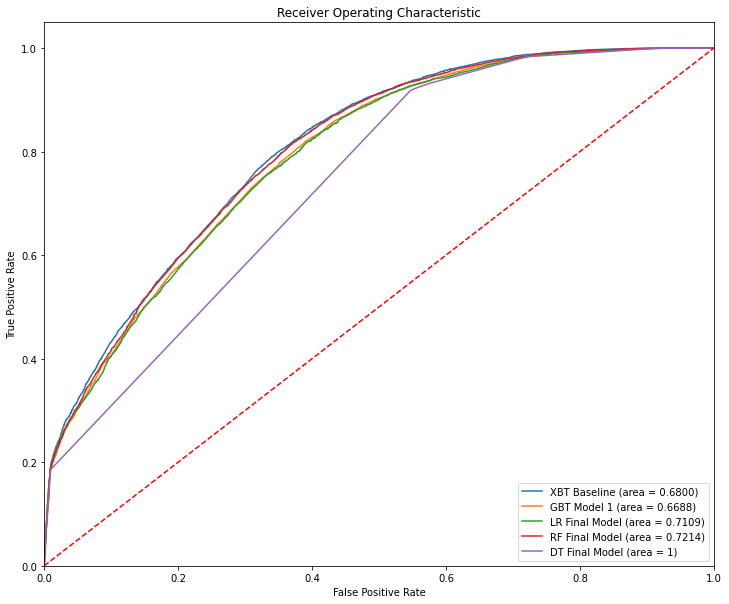

In [113]:
# Generate ROC plot with the results
plt.figure(figsize=(12,10))
plt.plot(XGB_fpr, XGB_tpr, label='XBT Baseline (area = %0.4f)' % XGB_roc_auc)
plt.plot(GBT_fpr, GBT_tpr, label='GBT Model 1 (area = %0.4f)' % GBT_roc_auc)
plt.plot(LR_fpr, LR_tpr, label='LR Final Model (area = %0.4f)' % LR_roc_auc)
plt.plot(RF_fpr, RF_tpr, label='RF Final Model (area = %0.4f)' % RF_roc_auc)
#plt.plot(KNN_fpr, KNN_tpr, label='KNN Final Model (area = %0.4f)' % KNN_roc_auc)
plt.plot(DT_fpr, DT_tpr, label='DT Final Model (area = %0.f)' % DT_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()